# 추가 데이터 얻어오기

In [1]:
import pandas as pd

gameList = pd.read_csv("./gameList4EDA.csv")
gameList

,appid,name,description,genres,review,r_sentences,d_sentences,r_tokenized_sentences,d_tokenized_sentences,g_tokenized,r_corpus,d_corpus
0,1174180,Red Dead Redemption 2,Winner of over 175 Game of the Year Awards and...,Open World Story Rich Adventure Western Action...,the only bad thing about the story is the empt...,['the only bad thing about the story is the em...,['Winner of over 175 Game of the Year Awards a...,"[['bad', 'thing', 'story', 'emptiness', 'feel'...","[['winner', '', 'year', 'award', 'recipient', ...","['open', 'world', 'story', 'rich', 'adventure'...","['bad', 'thing', 'story', 'emptiness', 'feel',...","['winner', '', 'year', 'award', 'recipient', '..."
1,578080,PUBG: BATTLEGROUNDS,Play PUBG: BATTLEGROUNDS for free. Land on str...,Survival Shooter Multiplayer Battle Royale FPS...,"The new privacy policy is insane,it allows the...","['The new privacy policy is insane,it allows t...","['Play PUBG: BATTLEGROUNDS for free.', 'Land o...","[['new', 'privacy', 'policy', 'insane', '', 'a...","[['play', 'pubg', '', 'battleground', 'free', ...","['survival', 'shooter', 'multiplayer', 'battle...","['new', 'privacy', 'policy', 'insane', '', 'al...","['play', 'pubg', '', 'battleground', 'free', '..."
2,1687950,Persona 5 Royal,Don the mask and join the Phantom Thieves of H...,JRPG Story Rich Anime RPG Party-Based RPG Turn...,"After 5 long years, Persona 5 fans can finally...","['After 5 long years, Persona 5 fans can final...",['Don the mask and join the Phantom Thieves of...,"[['', 'long', 'year', '', 'persona', '', 'fan'...","[['mask', 'join', 'phantom', 'thief', 'heart',...","['jrpg', 'story', 'rich', 'anime', 'rpg', 'par...","['', 'long', 'year', '', 'persona', '', 'fan',...","['mask', 'join', 'phantom', 'thief', 'heart', ..."
3,1172470,Apex Legends™,"Apex Legends is the award-winning, free-to-pla...",Free to Play Multiplayer Battle Royale Shooter...,doesnt launch with originedit: easy anti-cheat...,['doesnt launch with originedit: easy anti-che...,"['Apex Legends is the award-winning, free-to-p...","[['doesnt', 'launch', 'originedit', '', 'easy'...","[['apex', 'legend', 'awardwinning', '', 'freet...","['free', 'play', 'multiplayer', 'battle', 'roy...","['doesnt', 'launch', 'originedit', '', 'easy',...","['apex', 'legend', 'awardwinning', '', 'freeto..."
4,1811260,EA SPORTS™ FIFA 23,Experience the excitement of the biggest tourn...,Sports Soccer Immersive Sim Football Managemen...,"I guess the anticheat is working, because if y...","[""I guess the anticheat is working, because if...",['Experience the excitement of the biggest tou...,"[['guess', 'anticheat', 'working', '', 'ca', '...","[['experience', 'excitement', 'biggest', 'tour...","['sport', 'soccer', 'immersive', 'sim', 'footb...","['guess', 'anticheat', 'working', '', 'ca', 'n...","['experience', 'excitement', 'biggest', 'tourn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
18968,906600,Gunkid 99,GUNKID 99 is a fast and frantic 2D arena-shoot...,Indie Action Platformer Arcade 2D Pixel Graphi...,A nifty little 2D arena shooter Gunkid 99 is a...,['A nifty little 2D arena shooter Gunkid 99 is...,['GUNKID 99 is a fast and frantic 2D arena-sho...,"[['nifty', 'little', 'arena', 'shooter', 'gunk...","[['gunkid', '', 'fast', 'frantic', 'arenashoot...","['indie', 'action', 'platformer', 'arcade', 'p...","['nifty', 'little', 'arena', 'shooter', 'gunki...","['gunkid', '', 'fast', 'frantic', 'arenashoote..."
18969,1737200,Ardarium,"Watch a simulated 2D world including weather, ...",Simulation Casual Sandbox Education Colorful R...,For a couple of dollars it's a worthwhile expe...,"[""For a couple of dollars it's a worthwhile ex...",['Watch a simulated 2D world including weather...,"[['couple', 'dollar', 'worthwhile', 'experienc...","[['watch', 'simulated', 'world', 'including', ...","['simulation', 'casual', 'sandbox', 'education...","['couple', 'dollar', 'worthwhile', 'experience...","['watch', 'simulated', 'world', 'including', '..."
18970,1823570,Age of Valakas: Vi

In [230]:
gameList["name"].head(50)

0                         Red Dead Redemption 2
1                           PUBG: BATTLEGROUNDS
2                               Persona 5 Royal
3                                 Apex Legends™
4                            EA SPORTS™ FIFA 23
5                               Project Zomboid
6                Marvel’s Spider-Man Remastered
7                           MONSTER HUNTER RISE
8                                        Dota 2
9                  Sid Meier’s Civilization® VI
10                              Forza Horizon 5
11                        Football Manager 2023
12                             Dead by Daylight
13                                     Grounded
14                                         Raft
15                    The Witcher® 3: Wild Hunt
16                                    Destiny 2
17                                 It Takes Two
18                                  The Sims™ 4
19                                 Ready or Not
20    Sekiro™: Shadows Die Twice - GOTY 

In [2]:
gameList["appid"].values[0]

'1174180'

In [3]:
# [gameList["appid"].values[i] for i in range(len(gameList["appid"].values))]

## 크롤링

In [4]:
import requests
from bs4 import BeautifulSoup

In [5]:
def get_gameinfo(appid):
    url = 'https://store.steampowered.com/app/'
    response = requests.get(url=url+appid, headers={'User-Agent': 'Mozilla/5.0'})
    a = response.content
    soup = BeautifulSoup(a, 'html.parser')
    return soup

In [6]:
import pandas as pd
from tqdm import tqdm

df_game_review_num = pd.DataFrame(columns=("appid", "review_all_num"))

for k, j in tqdm(enumerate([gameList["appid"].values[i] for i in range(len(gameList["appid"].values))])):
    try:
        pp = get_gameinfo(j)
        review_all_num = pp.select("span.responsive_hidden")[1].text.replace("\r", "").replace("\n", "").replace("\t", "").replace("(", "").replace(")", "").replace(",", "")



        df_game_review_num.loc[k] = [j, review_all_num]
        
    except:
        pass


18973it [3:34:07,  1.48it/s]


In [99]:
df_game_review_num.loc[df_game_review_num['review_all_num'] == ":", 'review_all_num'] = 0
df_game_review_num.loc[df_game_review_num['review_all_num'] == "NaN", 'review_all_num'] = 0
df_game_review_num.loc[df_game_review_num['review_all_num'] == 'Explore and Customize', 'review_all_num'] = 0
df_game_review_num

,appid,review_all_num
0,1174180,292346
1,578080,2110680
2,1687950,15001
3,1172470,540204
4,1811260,29129
...,...,...
18953,906600,0
18954,1737200,0
18955,1823570,35
18956,1516320,0


In [100]:
df_game_review_num.to_csv("./game_review_num.csv", index=False)

## 데이터를 다시 합쳐 줍니다 (모델 준비)

In [101]:
df_game_review_num = pd.read_csv("./game_review_num.csv")

In [102]:
gameList_model = gameList[["appid", "name"]]
gameList_model

,appid,name
0,1174180,Red Dead Redemption 2
1,578080,PUBG: BATTLEGROUNDS
2,1687950,Persona 5 Royal
3,1172470,Apex Legends™
4,1811260,EA SPORTS™ FIFA 23
...,...,...
18968,906600,Gunkid 99
18969,1737200,Ardarium
18970,1823570,Age of Valakas: Vietnam
18971,1516320,Skeleton King


In [103]:
gameList_model_df = pd.merge(gameList_model, df_game_review_num, on="appid", how="left")

In [104]:
gameList_model_df

,appid,name,review_all_num
0,1174180,Red Dead Redemption 2,292346.0
1,578080,PUBG: BATTLEGROUNDS,2110680.0
2,1687950,Persona 5 Royal,15001.0
3,1172470,Apex Legends™,540204.0
4,1811260,EA SPORTS™ FIFA 23,29129.0
...,...,...,...
18968,906600,Gunkid 99,0.0
18969,1737200,Ardarium,0.0
18970,1823570,Age of Valakas: Vietnam,35.0
18971,1516320,Skeleton King,0.0


In [105]:
gameList_model_df.to_csv("./gameList_model.csv", index=False)

# 벡터 불러오기

## cbow 방식 벡터

In [374]:
import numpy as np

cbow_tag = np.load("./cbow_tag.npy")
cbow_tag

array([[ 0.29727224,  0.46113622, -0.25688866, ...,  0.5537447 ,
        -0.02496067,  0.12328632],
       [ 0.31467575,  0.5206053 ,  0.15810776, ...,  0.43429455,
        -0.00585406, -0.2720833 ],
       [-0.17545432,  0.161905  , -0.5082145 , ...,  0.05665078,
         0.13881764,  0.62965167],
       ...,
       [ 0.54618555,  0.35768834, -0.19706382, ...,  0.29204702,
        -0.14282043, -0.06405571],
       [ 0.26247147, -0.14642626,  0.06928363, ...,  0.54578716,
         0.0720831 , -0.0455759 ],
       [ 0.44289628, -0.08255416, -0.08915486, ..., -0.06952564,
         0.17200378,  0.31859484]], dtype=float32)

In [375]:
cbow_tag[1]

array([ 0.31467575,  0.5206053 ,  0.15810776,  0.10108522, -0.23483397,
       -0.5867558 ,  0.11873552,  0.01974287,  0.7774043 ,  0.8599926 ,
        0.01330016,  0.44323516, -0.09188858, -0.4701885 ,  0.03661178,
        0.78648263, -0.12822594, -0.17099814,  0.37363693,  0.7548728 ,
       -0.11453888, -0.4358664 , -0.03333718, -0.39775193,  0.35665733,
        0.17263918, -0.5723341 , -0.18910056,  0.4854966 ,  0.18569925,
       -0.23605393,  0.30560714,  0.27568412,  0.36533955,  0.5313326 ,
        0.1479115 , -0.5074465 , -0.2618301 ,  0.32271248, -0.41530144,
       -0.02530863, -0.04068211, -0.2972612 ,  0.54933745, -0.39100677,
       -0.26536232, -0.4808693 ,  0.18958795, -0.7054702 , -0.2387443 ,
       -0.30459172,  0.1857498 , -0.3501984 ,  0.08185839,  0.3491885 ,
        0.02464084, -0.3497714 , -0.37013286, -0.14381498, -0.37665164,
        0.05198589, -0.22916329, -0.38006595, -0.03666951, -0.10764633,
        0.05797267,  0.2364294 ,  0.04223916,  0.21099098,  0.30

In [376]:
cbow_review = np.load("./cbow_review.npy")
cbow_description = np.load("./cbow_description.npy")

In [251]:
len(cbow_tag), len(cbow_review), len(cbow_description)

(18973, 18973, 18973)

보팅 기법 -> 찾아 보니까 다양한 모델을 갖고 그 모델에서 분류된 결과를 코딩하는 거라서 적절하지 않은 것 같음

In [377]:
cbow_whole = np.concatenate([cbow_tag, cbow_review, cbow_description], 1)

In [378]:
len(cbow_whole[1])

300

### 원래 시스템

In [379]:
gameList_model_df = pd.read_csv("./gameList_model.csv")

In [255]:
from sklearn.metrics.pairwise import cosine_similarity
similarity =cosine_similarity(cbow_whole)

In [256]:
def recommend(steam_game):
    game_index=gameList_model_df[gameList_model_df['name']==steam_game].index[0]
    distances=similarity[game_index]
    game_list=sorted(list(enumerate(distances)), reverse=True ,key=lambda x:x[1])[1:6]
    for i in game_list:
         print(gameList_model_df.iloc[i[0]]["name"])

In [257]:
recommend("Persona 5 Royal")

Seek Girl V
Xuan-Yuan Sword: The Gate of Firmament
Magical Diary: Horse Hall
IronBorn
Princess Maker 2 Refine


### Kmeans 이용

In [391]:
import numpy as np
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 43, n_init=12)
k_means.fit(cbow_whole)

k_means_labels = k_means.labels_
k_means_labels

array([22, 12, 15, ...,  4, 38, 11])

#### 실루엣 계수 함수

In [24]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. max_iter: 클러스터 최대 반복 횟수
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. cm.nipy_spectral 컬러 지정
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

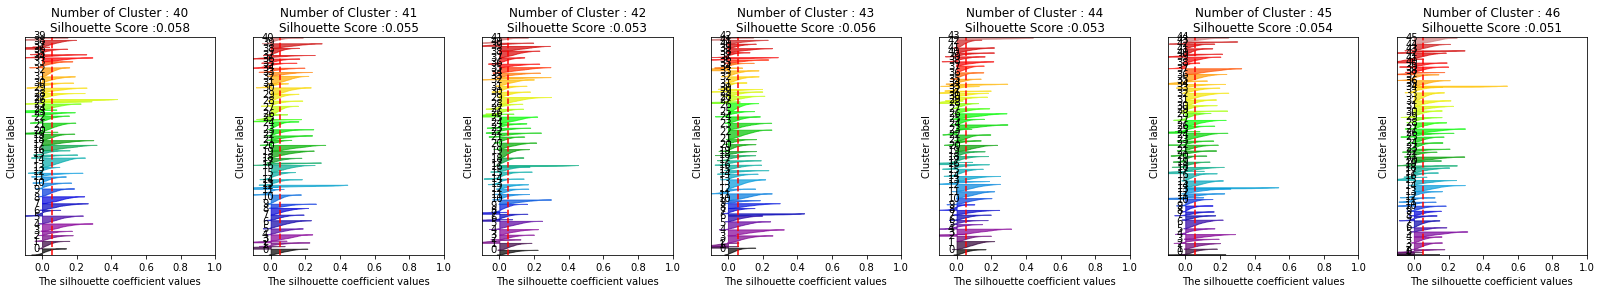

In [239]:
visualize_silhouette([ 40, 41, 42, 43, 44, 45, 46 ], cbow_whole)

### 함수 구현 (최종 모델)

In [395]:
gameList_model_df = pd.read_csv("./gameList_model.csv")

In [396]:
gameList_model_df["segment"] = k_means_labels

In [397]:
def recommend_new(steam_game, int_num):
    global gameList_model_df
    game_index=gameList_model_df[gameList_model_df['name']==steam_game].index[0]
    segment=k_means_labels[game_index]
    
    gameList_model_df_new = gameList_model_df.fillna(0)
    gameList_model_df_new = gameList_model_df_new.astype({'review_all_num':'int'})
    gameList_model_df_new = gameList_model_df_new.sort_values(['segment', 'review_all_num'], ascending=False)
    
    game_list_df_final = gameList_model_df_new[gameList_model_df_new["segment"]==segment].reset_index(drop=True)
    game_list_df_final = game_list_df_final[game_list_df_final["name"]!=steam_game]
    
    for i in range(int_num):
        name_print = game_list_df_final[0:int_num].values[i][1]
        print(name_print)

In [398]:
recommend_new("Persona 5 Royal", 5)

Persona 4 Golden
OMORI
South Park™: The Stick of Truth™
Transistor
Pathfinder: Kingmaker - Enhanced Plus Edition


In [399]:
recommend_new("PUBG: BATTLEGROUNDS", 5)

Counter-Strike: Global Offensive
Dota 2
Tom Clancy's Rainbow Six® Siege
Team Fortress 2
Apex Legends™


In [400]:
recommend_new("The Sims™ 4", 5)

Stardew Valley
Totally Accurate Battle Simulator
House Flipper
Clicker Heroes
AdVenture Capitalist


## glove 방식 벡터

In [191]:
import numpy as np

glove_tag = np.load("./glove_tag.npy")
glove_review = np.load("./glove_review.npy")
glove_description = np.load("./glove_description.npy")

In [192]:
len(glove_tag), len(glove_review), len(glove_description)

(18973, 18973, 18973)

In [194]:
glove_whole = np.concatenate([glove_tag, glove_review, glove_description], 1)
len(glove_whole[0])

300

### K-means 이용

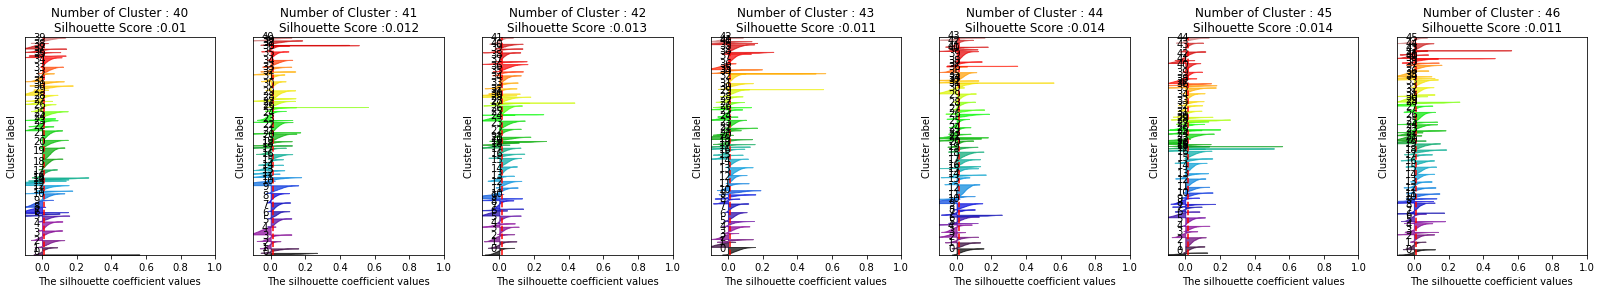

In [247]:
visualize_silhouette([ 40, 41, 42, 43, 44, 45, 46 ], glove_whole)

실루엣 계수로 집단을 몇으로 나눌지 예측했을 때 집단을 나누는 게 별로라는 것을 알 수 있다. 이 방식으로 데이터를 추출하는 건 별로 안 좋은 것 같음

In [196]:
import numpy as np
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 2, n_init=12)
k_means.fit(glove_whole)

k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 1, ..., 0, 1, 1])

### 함수 구현

In [197]:
gameList_model_df = pd.read_csv("./gameList_model.csv")

In [198]:
gameList_model_df["segment"] = k_means_labels

In [199]:
def recommend_new(steam_game):
    global gameList_model_df
    game_index=gameList_model_df[gameList_model_df['name']==steam_game].index[0]
    segment=k_means_labels[game_index]
    
    gameList_model_df_new = gameList_model_df.fillna(0)
    gameList_model_df_new = gameList_model_df_new.astype({'review_all_num':'int'})
    gameList_model_df_new = gameList_model_df_new.sort_values(['segment', 'review_all_num'], ascending=False)
    
    game_list_df_final = gameList_model_df_new[gameList_model_df_new["segment"]==segment].reset_index(drop=True)
    
    for i in range(5):
        print(game_list_df_final[0:5].values[i][1])

In [200]:
recommend_new("Persona 5 Royal")

Dead by Daylight
Phasmophobia
Portal 2
Hollow Knight
Geometry Dash


In [ ]:
recommend_new("PUBG: BATTLEGROUNDS")

In [ ]:
recommend_new("The Sims™ 4")

# 모델 새로 만들기-15개 추천

In [333]:
import numpy as np

cbow_tag = np.load("./cbow_tag.npy")
cbow_review = np.load("./cbow_review.npy")
cbow_description = np.load("./cbow_description.npy")

In [334]:
import numpy as np
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 43, n_init=12)
k_means.fit(cbow_tag)

k_means_labels1 = k_means.labels_
k_means_labels1

array([25, 39,  2, ..., 25, 11,  7])

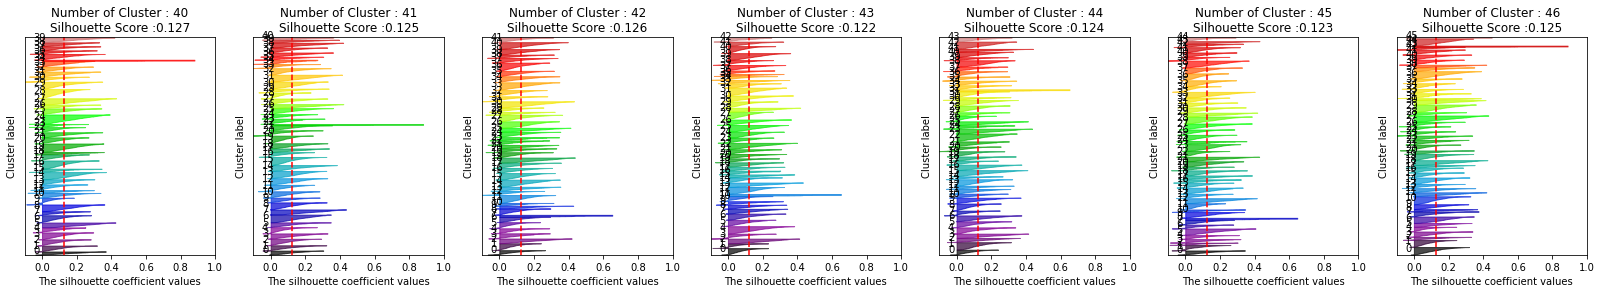

In [335]:
visualize_silhouette([ 40, 41, 42, 43, 44, 45, 46 ], cbow_tag)

In [337]:
import numpy as np
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 43, n_init=12)
k_means.fit(cbow_review)

k_means_labels2 = k_means.labels_
k_means_labels2

array([24, 36, 23, ..., 39,  7, 17])

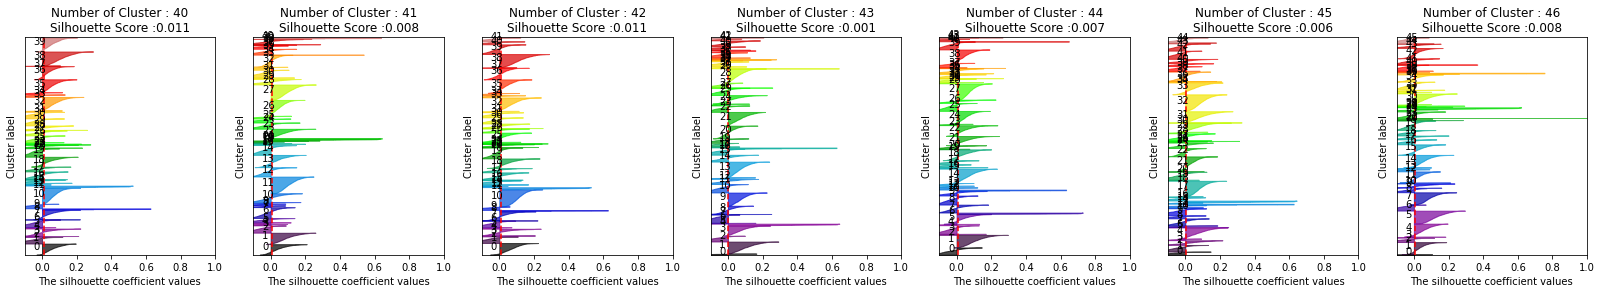

In [338]:
visualize_silhouette([ 40, 41, 42, 43, 44, 45, 46 ], cbow_review)

In [339]:
import numpy as np
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 43, n_init=12)
k_means.fit(cbow_description)

k_means_labels3 = k_means.labels_
k_means_labels3

array([22, 35, 13, ..., 42, 29, 28])

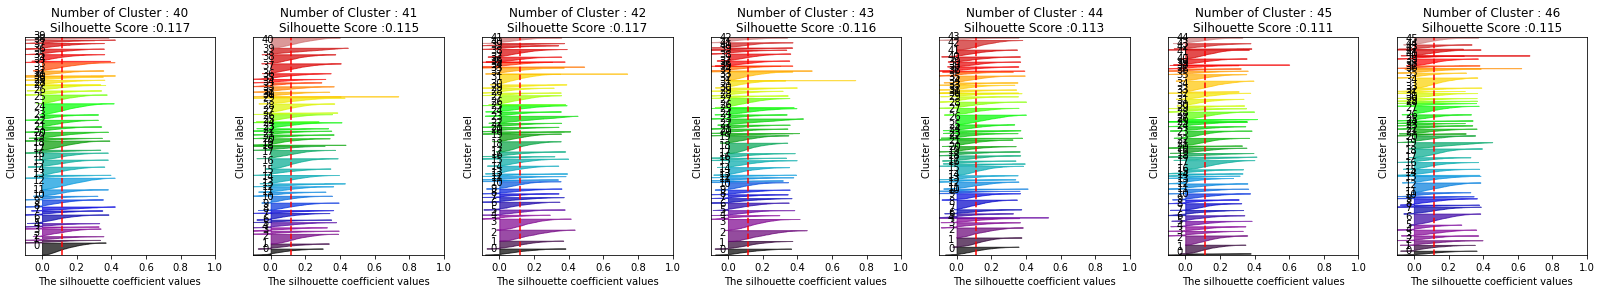

In [340]:
visualize_silhouette([ 40, 41, 42, 43, 44, 45, 46 ], cbow_description)

## 함수 구현

In [345]:
gameList_model_df = pd.read_csv("./gameList_model.csv")

In [346]:
gameList_model_df["segment1"] = k_means_labels1
gameList_model_df["segment2"] = k_means_labels2
gameList_model_df["segment3"] = k_means_labels3

In [363]:
def recommend_new(steam_game, int_num):
    global gameList_model_df
    game_index=gameList_model_df[gameList_model_df['name']==steam_game].index[0]
    segment1=k_means_labels1[game_index]
    segment2=k_means_labels2[game_index]
    segment3=k_means_labels3[game_index]
    
    
    gameList_model_df1_new = gameList_model_df.fillna(0)
    gameList_model_df1_new = gameList_model_df1_new.astype({'review_all_num':'int'})
    gameList_model_df1_new = gameList_model_df1_new.sort_values(['segment1', 'review_all_num'], ascending=False)
    
    game_list_df_final1 = gameList_model_df1_new[gameList_model_df1_new["segment1"]==segment1].reset_index(drop=True)
    game_list_df_final1 = game_list_df_final1[game_list_df_final1["name"]!=steam_game]
    game_list_df_final1 = game_list_df_final1.drop_duplicates(subset='name',keep='first')
    
    print("★ 태그 관련도를 통해서 게임을 추천합니다. ★")
    print("----------------------------------------------")
    for i in range(int_num):
        print(game_list_df_final1[0:5].values[i][1])
        
    print()
    print()
    
    gameList_model_df2_new = gameList_model_df.fillna(0)
    gameList_model_df2_new = gameList_model_df2_new.astype({'review_all_num':'int'})
    gameList_model_df2_new = gameList_model_df2_new.sort_values(['segment2', 'review_all_num'], ascending=False)
    
    game_list_df_final2 = gameList_model_df2_new[gameList_model_df2_new["segment2"]==segment2].reset_index(drop=True)
    game_list_df_final2 = game_list_df_final2[game_list_df_final2["name"]!=steam_game]
    game_list_df_final2 = game_list_df_final2.drop_duplicates(subset='name',keep='first')
    
    print("★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★")
    print("-----------------------------------------------------")
    for i in range(int_num):
        print(game_list_df_final2[0:5].values[i][1])
        
    print()
    print()
    
    gameList_model_df3_new = gameList_model_df.fillna(0)
    gameList_model_df3_new = gameList_model_df3_new.astype({'review_all_num':'int'})
    gameList_model_df3_new = gameList_model_df3_new.sort_values(['segment3', 'review_all_num'], ascending=False)
    
    game_list_df_final3 = gameList_model_df3_new[gameList_model_df3_new["segment3"]==segment3].reset_index(drop=True)
    game_list_df_final3 = game_list_df_final3[game_list_df_final3["name"]!=steam_game]
    game_list_df_final3 = game_list_df_final3.drop_duplicates(subset='name',keep='first')
    
    print("★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★")
    print("-----------------------------------------------------")
    for i in range(int_num):
        print(game_list_df_final3[0:5].values[i][1])
    
    

In [364]:
recommend_new("Persona 5 Royal", 5)

★ 태그 관련도를 통해서 게임을 추천합니다. ★
----------------------------------------------
Persona 4 Golden
OMORI
South Park™: The Stick of Truth™
Pathfinder: Kingmaker - Enhanced Plus Edition
FINAL FANTASY VII


★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★
-----------------------------------------------------
ELDEN RING
Hollow Knight
No Man's Sky
Sekiro™: Shadows Die Twice - GOTY Edition
Half-Life 2


★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★
-----------------------------------------------------
Rust
Unturned
Dying Light 2 Stay Human
Muse Dash
BattleBlock Theater®


In [365]:
recommend_new("PUBG: BATTLEGROUNDS", 5)

★ 태그 관련도를 통해서 게임을 추천합니다. ★
----------------------------------------------
Counter-Strike: Global Offensive
Tom Clancy's Rainbow Six® Siege
Apex Legends™
Destiny 2
Unturned


★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★
-----------------------------------------------------
DARK SOULS™ III
Robocraft
Assassin's Creed® Odyssey
Sid Meier's Civilization® V
Squad


★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★
-----------------------------------------------------
Destiny 2
Brawlhalla
Human: Fall Flat
Counter-Strike
World of Warships


In [366]:
recommend_new("The Sims™ 4", 5)

★ 태그 관련도를 통해서 게임을 추천합니다. ★
----------------------------------------------
Stardew Valley
Totally Accurate Battle Simulator
Slime Rancher
SPORE™
PC Building Simulator


★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★
-----------------------------------------------------
Phasmophobia
New World
Halo: The Master Chief Collection
Battlefield™ V
Splitgate


★ 사용자 리뷰 관련도를 통해서 게임을 추천합니다. ★
-----------------------------------------------------
Don't Starve
Starbound
Wolcen: Lords of Mayhem
Saints Row IV
Planet Zoo
